## 1、散点图

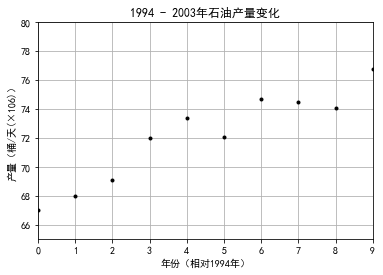

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 解决中文显示及负号显示问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 年份数据（1994年对应0，2003年对应9，共10年）
x = np.arange(0, 10, 1, dtype='float')  # 注意这里改为0到9，对应10个年份
y = np.array([67.052, 68.008, 69.083, 72.024, 73.400, 
              72.063, 74.669, 74.487, 74.065, 76.777], dtype='float')

# 作图
plt.figure()
plt.title(u'1994 - 2003年石油产量变化')
plt.xlabel(u'年份（相对1994年）')
plt.ylabel(u'产量（桶/天(×106)）')
plt.axis([0, 9, 65, 80])  # x轴范围保持0到9（对应10个数据点）
plt.grid(True)
plt.plot(x, y, 'k.')  # 绘制散点图

plt.show()
#相比之前

## 2、拟合

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

# 数据准备
x = np.arange(0, 10)  # 1994(0)~2003(9)
y = np.array([67.052, 68.008, 69.083, 72.024, 73.400,
              72.063, 74.669, 74.487, 74.065, 76.777])

# 定义拟合函数
def linear_fun(s, x):    # 直线
    k, b = s
    return k * x + b

def quadratic_fun(s, x): # 抛物线
    k1, k2, b = s
    return k1 * x**2 + k2 * x + b

def cubic_fun(s, x):     # 立方曲线
    k1, k2, k3, b = s
    return k1 * x**3 + k2 * x**2 + k3 * x + b

# 残差函数
def residual(params, func, x, y):
    return func(params, x) - y

# 执行拟合
params_list = [
    ([0,0], linear_fun),        # 直线初始参数
    ([0,0,0], quadratic_fun),   # 抛物线初始参数
    ([0,0,0,0], cubic_fun)      # 立方曲线初始参数
]

results = []
for init_param, func in params_list:
    p, _ = leastsq(residual, init_param, args=(func, x, y))
    results.append( (func, p) )  # 存储函数对象和参数

# 显示拟合结果
print("拟合函数表达式：")
for func, p in results:
    if func == linear_fun:
        print(f"(a) 直线：y = {p[0]:.3f}x + {p[1]:.3f}")
    elif func == quadratic_fun:
        print(f"(b) 抛物线：y = {p[0]:.3f}x² + {p[1]:.3f}x + {p[2]:.3f}")
    elif func == cubic_fun:
        print(f"(c) 立方曲线：y = {p[0]:.3f}x³ + {p[1]:.3f}x² + {p[2]:.3f}x + {p[3]:.3f}")

# 残差分析
metrics = []
for func, p in results:
    y_fit = func(p, x)
    residual = y - y_fit
    metrics.append({
        '模型': func.__name__,
        '残差二范数': np.linalg.norm(residual),
        '绝对残差均值': np.abs(residual).mean(),
        '残差标准差': residual.std()
    })

# 预测2010年产量（x=16，对应2010-1994=16）
pred_2010 = []
for func, p in results:
    if func == linear_fun:
        pred = p[0]*16 + p[1]
    elif func == quadratic_fun:
        pred = p[0]*(16**2) + p[1]*16 + p[2]
    else:
        pred = p[0]*(16**3) + p[1]*(16**2) + p[2]*16 + p[3]
    pred_2010.append(pred)

# 结果展示
print("\n残差分析：")
for metric in metrics:
    print(f"{metric['模型']}: 二范数={metric['残差二范数']:.2f}, 绝对均值={metric['绝对残差均值']:.2f}, 标准差={metric['残差标准差']:.2f}")

print("\n2010年预测产量（×10⁶桶/天）：")
print(f"(a) 直线: {pred_2010[0]:.1f}")
print(f"(b) 抛物线: {pred_2010[1]:.1f}")
print(f"(c) 立方曲线: {pred_2010[2]:.1f}")

拟合函数表达式：
(a) 直线：y = 0.991x + 67.703
(b) 抛物线：y = -0.070x² + 1.618x + 66.867
(c) 立方曲线：y = 0.013x³ + -0.249x² + 2.232x + 66.531

残差分析：
linear_fun: 二范数=3.16, 绝对均值=0.85, 标准差=1.00
quadratic_fun: 二范数=2.72, 绝对均值=0.78, 标准差=0.86
cubic_fun: 二范数=2.62, 绝对均值=0.76, 标准差=0.83

2010年预测产量（×10⁶桶/天）：
(a) 直线: 83.6
(b) 抛物线: 74.9
(c) 立方曲线: 92.9


[直线拟合] 残差分析：
  二范数：3.16
  绝对残差均值：0.85
  残差标准差：1.00

[抛物线拟合] 残差分析：
  二范数：2.72
  绝对残差均值：0.78
  残差标准差：0.86

[立方曲线拟合] 残差分析：
  二范数：2.62
  绝对残差均值：0.76
  残差标准差：0.83



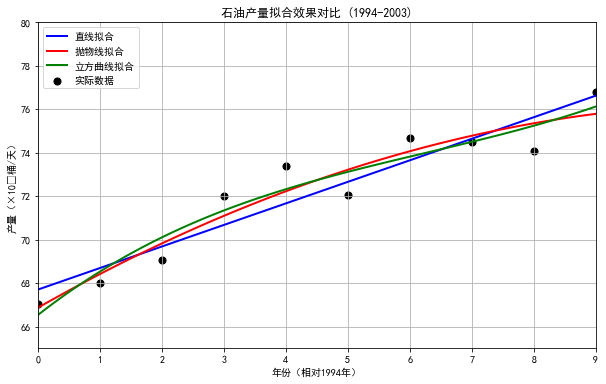

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

# 数据准备
x = np.arange(0, 10)  # 1994(0)~2003(9)
y = np.array([67.052, 68.008, 69.083, 72.024, 73.400,
              72.063, 74.669, 74.487, 74.065, 76.777])

# 定义拟合函数
def linear_fun(s, x):    # 直线
    k, b = s
    return k * x + b

def quadratic_fun(s, x): # 抛物线
    k1, k2, b = s
    return k1 * x**2 + k2 * x + b

def cubic_fun(s, x):     # 立方曲线
    k1, k2, k3, b = s
    return k1 * x**3 + k2 * x**2 + k3 * x + b

# 残差函数
def residual(params, func, x, y):
    return func(params, x) - y

# 配置拟合参数
funs = [linear_fun, quadratic_fun, cubic_fun]
params = [[0,0], [0,0,0], [0,0,0,0]]
colors = ['blue', 'red', 'green']
labels = ['直线拟合', '抛物线拟合', '立方曲线拟合']

# 创建画布
plt.figure(figsize=(10,6))
plt.title('石油产量拟合效果对比 (1994-2003)')
plt.xlabel('年份（相对1994年）')
plt.ylabel('产量（×10⁶桶/天）')
plt.grid(True)
plt.scatter(x, y, c='black', s=50, label='实际数据')  # 原始数据点

# 执行所有拟合
for func, param, color, label in zip(funs, params, colors, labels):
    # 最小二乘拟合
    var = leastsq(residual, param, args=(func, x, y))[0]
    
    # 生成拟合曲线
    x_fit = np.linspace(0, 9, 100)
    y_fit = func(var, x_fit)
    
    # 绘制曲线
    plt.plot(x_fit, y_fit, color=color, linewidth=2, label=label)
    
    # 输出残差分析
    y_pred = func(var, x)
    res = y - y_pred
    print(f'[{label}] 残差分析：')
    print(f'  二范数：{np.linalg.norm(res):.2f}')
    print(f'  绝对残差均值：{np.abs(res).mean():.2f}')
    print(f'  残差标准差：{res.std():.2f}\n')

# 显示图例和图形
plt.legend(loc='upper left')
plt.axis([0, 9, 65, 80])
plt.show()

[直线拟合] 残差分析：
  二范数：3.16
  绝对残差均值：0.85
  残差标准差：1.00

[抛物线拟合] 残差分析：
  二范数：2.72
  绝对残差均值：0.78
  残差标准差：0.86

[立方曲线拟合] 残差分析：
  二范数：2.62
  绝对残差均值：0.76
  残差标准差：0.83

拟合函数表达式：
(a) 直线：y = 0.991x + 67.703
(b) 抛物线：y = -0.070x² + 1.618x + 66.867
(c) 立方曲线：y = 0.013x³ + -0.249x² + 2.232x + 66.531

残差分析：
直线拟合: 二范数=3.16, 绝对均值=0.85, 标准差=1.00
抛物线拟合: 二范数=2.72, 绝对均值=0.78, 标准差=0.86
立方曲线拟合: 二范数=2.62, 绝对均值=0.76, 标准差=0.83

2010年预测产量（×10⁶桶/天）：
(a) 直线: 83.6
(b) 抛物线: 74.9
(c) 立方曲线: 92.9


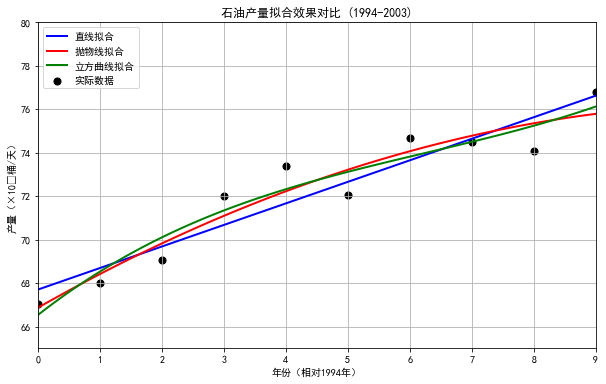

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

# 数据准备
x = np.arange(0, 10)  # 1994(0)~2003(9)
y = np.array([67.052, 68.008, 69.083, 72.024, 73.400,
              72.063, 74.669, 74.487, 74.065, 76.777])

# 定义拟合函数
def linear_fun(s, x):    # 直线
    k, b = s
    return k * x + b

def quadratic_fun(s, x): # 抛物线
    k1, k2, b = s
    return k1 * x**2 + k2 * x + b

def cubic_fun(s, x):     # 立方曲线
    k1, k2, k3, b = s
    return k1 * x**3 + k2 * x**2 + k3 * x + b

# 残差函数
def residual(params, func, x, y):
    return func(params, x) - y

# 拟合参数配置
funs = [linear_fun, quadratic_fun, cubic_fun]
params = [[0,0], [0,0,0], [0,0,0,0]]
colors = ['blue', 'red', 'green']
labels = ['直线拟合', '抛物线拟合', '立方曲线拟合']

# 拟合结果与残差分析
results = []
metrics = []
pred_2010 = []

plt.figure(figsize=(10,6))
plt.title('石油产量拟合效果对比 (1994-2003)')
plt.xlabel('年份（相对1994年）')
plt.ylabel('产量（×10⁶桶/天）')
plt.grid(True)
plt.scatter(x, y, c='black', s=50, label='实际数据')  # 原始数据点

for func, param, color, label in zip(funs, params, colors, labels):
    # 最小二乘拟合
    var = leastsq(residual, param, args=(func, x, y))[0]
    results.append((func, var))
    
    # 生成拟合曲线
    x_fit = np.linspace(0, 9, 100)
    y_fit = func(var, x_fit)
    plt.plot(x_fit, y_fit, color=color, linewidth=2, label=label)
    
    # 残差分析
    y_pred = func(var, x)
    res = y - y_pred
    metrics.append({
        '模型': label,
        '残差二范数': np.linalg.norm(res),
        '绝对残差均值': np.abs(res).mean(),
        '残差标准差': res.std()
    })
    print(f'[{label}] 残差分析：')
    print(f'  二范数：{np.linalg.norm(res):.2f}')
    print(f'  绝对残差均值：{np.abs(res).mean():.2f}')
    print(f'  残差标准差：{res.std():.2f}\n')
    
    # 2010年预测（x=16）
    if func == linear_fun:
        pred = var[0]*16 + var[1]
    elif func == quadratic_fun:
        pred = var[0]*(16**2) + var[1]*16 + var[2]
    else:
        pred = var[0]*(16**3) + var[1]*(16**2) + var[2]*16 + var[3]
    pred_2010.append(pred)

# 拟合表达式输出
print("拟合函数表达式：")
for func, p in results:
    if func == linear_fun:
        print(f"(a) 直线：y = {p[0]:.3f}x + {p[1]:.3f}")
    elif func == quadratic_fun:
        print(f"(b) 抛物线：y = {p[0]:.3f}x² + {p[1]:.3f}x + {p[2]:.3f}")
    elif func == cubic_fun:
        print(f"(c) 立方曲线：y = {p[0]:.3f}x³ + {p[1]:.3f}x² + {p[2]:.3f}x + {p[3]:.3f}")

print("\n残差分析：")
for metric in metrics:
    print(f"{metric['模型']}: 二范数={metric['残差二范数']:.2f}, 绝对均值={metric['绝对残差均值']:.2f}, 标准差={metric['残差标准差']:.2f}")

print("\n2010年预测产量（×10⁶桶/天）：")
print(f"(a) 直线: {pred_2010[0]:.1f}")
print(f"(b) 抛物线: {pred_2010[1]:.1f}")
print(f"(c) 立方曲线: {pred_2010[2]:.1f}")

plt.legend(loc='upper left')
plt.axis([0, 9, 65, 80])
plt.show()